# Loan Approval Prediction

### Loan approval prediction, aims at predicting if the customer is eligible to be sanctioned a loan based on some critical input features that the loan repayment ability relies on. Using this model, the financial institution can check the eligibility of the customer applying for loans. This can be used as an initial examination to evaluate if the customer will be promising with respect to the debt repayment and once there is an estimation that the person is eligible, the mortgage underwriters can then use the detailed analysis such as Credit, Capacity, Capital and Collateral evaluation methods based on the respective guidelines and come to a more precise conclusion if the loan can be sanctioned to the customer or not with very low risks for the funding financial institutions.

# About Dataset

This data set contains details of a loan applicant, and the target variable showing if the customer will be approved with a loan.

Link: https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval


## Features

### Loan_ID:

Unique Loan ID.


### Gender:

If the applicant is Male/ Female.


### Married:

Marital status of the applicant.


### Dependents:

Number of dependents of the applicant.


### Education	:

Applicant Education Qualification (Graduate/ Under Graduate).


### Self_Employed:

Self-employed (Y/N).


### ApplicantIncome:

Applicant's income in Dollars.


### CoapplicantIncome:

Co-applicant's(If any) income in Dollars.


### LoanAmount:

Loan amount	in Thousand Dollars.


### Loan_Amount_Term:

Term of the loan in months.


### Credit_History:

credit history meets guidelines(1 if yes and 0 if no).


### Property_Area:

Property is located in Urban/ Semi Urban/ Rural.


### Loan_Status:

Yes if the loan is approved and No if the loan is declined.

In [1]:
# Importing required Libraries

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the dataset

df_train = pd.read_csv('loan_sanction_train.csv')
df_test = pd.read_csv('loan_sanction_test.csv')

In [3]:
# Columns present in the dataset

print("Columns in the train dataset",df_train.columns)
print()
print("Columns in the test dataset",df_test.columns)

Columns in the train dataset Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Columns in the test dataset Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [4]:
# Checking the first 10 rows of train dataset

df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# Checking the first 10 rows of test dataset

df_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [6]:
# Checking the last 10 rows of train dataset:

df_train.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
# Checking the last 10 rows of train dataset:

df_test.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
357,LP002952,Male,No,0,Graduate,No,2500,0,60.0,360.0,1.0,Urban
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural
359,LP002962,Male,No,0,Graduate,No,4000,2667,152.0,360.0,1.0,Semiurban
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,NaN,Urban
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [8]:
# Checking the number of rows and columns.

print("Total number of observations/rows in train dataset are:", df_train.shape[0])
print("Total number of features/columns in train dataset are:", df_train.shape[1])
print()
print("Total number of observations/rows in test dataset are:", df_test.shape[0])
print("Total number of features/columns in test dataset are:", df_test.shape[1])

Total number of observations/rows in train dataset are: 614
Total number of features/columns in train dataset are: 13

Total number of observations/rows in test dataset are: 367
Total number of features/columns in test dataset are: 12


Considering only train data for preprocessing and then using the test data for preprocessing.

In [9]:
# Checking the basic info of the data.

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# Handling the missing values before proceeding with the Analysis of the data.

pd.DataFrame(round(df_train.isnull().sum()/len(df_train)*100,3), columns=['Missing Values in %'], index = df_train.columns)

,Missing Values in %
Loan_ID,0.000
Gender,2.117
Married,0.489
Dependents,2.443
Education,0.000
Self_Employed,5.212
ApplicantIncome,0.000
CoapplicantIncome,0.000
LoanAmount,3.583
Loan_Amount_Term,2.280


Although it is not logical to impute some of the values of the applicants using methods like mode, since the dataset is very small, we cannot afford to drop any observations.

In [11]:
# Mode Imputations for the below categorical columns:

df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])

# Also since if null values are there for dependants it can be assumed that the number of dependants for tha applicant is 0.
df_train['Dependents'] = df_train['Dependents'].fillna('0')


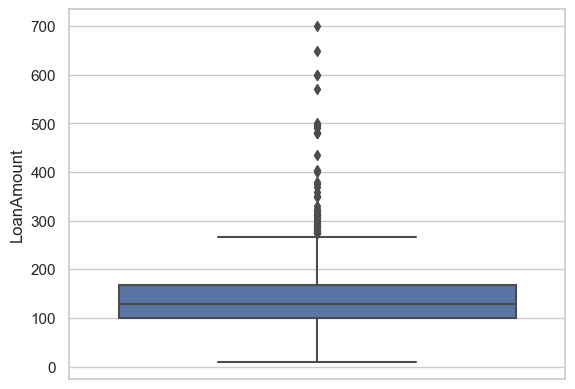

In [12]:
# Checking how the data is distributed to impute values for Loan Amount variable:

sns.boxplot(data=df_train, y = 'LoanAmount')
plt.show()

In [13]:
# Since there is presence of outliers, using median value of the Loan Amount to impute the null values.

df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())

In [14]:
# Confirming if all the null values are imputed:

pd.DataFrame(round(df_train.isnull().sum()/len(df_train)*100,3), columns=['Missing Values in %'], index = df_train.columns)

,Missing Values in %
Loan_ID,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


In [15]:
# Since Loan ID is insignificant in predicting the Loan Status, dropping the same:

df_train.drop('Loan_ID', axis=1, inplace=True)

In [16]:
# Checking the data description of all the variables, which gives us the count, mean, std, minimum, 25th quartile, 
# median, 75th quartile and maximum values in the respective numerical columns.

df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,614,2,Male,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614,4,0,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,NaN,NaN,NaN,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0
Credit_History,614.0,NaN,NaN,NaN,0.855049,0.352339,0.0,1.0,1.0,1.0,1.0


In [17]:
# Before Starting the Exploratory Data Analysis, Seeing how the data values look like for all the observations:

for i in df_train.columns:
    print("*"*50, i, "*"*50)
    print(set(df_train[i].to_list()))

************************************************** Gender **************************************************
{'Male', 'Female'}
************************************************** Married **************************************************
{'Yes', 'No'}
************************************************** Dependents **************************************************
{'1', '2', '0', '3+'}
************************************************** Education **************************************************
{'Not Graduate', 'Graduate'}
************************************************** Self_Employed **************************************************
{'Yes', 'No'}
************************************************** ApplicantIncome **************************************************
{4100, 2058, 4106, 2060, 2071, 4124, 2083, 4133, 4160, 4166, 4167, 6216, 2130, 2132, 4180, 2137, 2138, 4188, 4191, 2149, 4200, 6250, 8300, 6256, 2165, 2167, 4226, 2178, 6277, 4230, 6283, 8333, 8334, 16525, 2192, 150, 2213, 2

# Exploratory Data Analysis

## Univariate Analysis of the features

In [17]:
num_fts = df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status']]
cat_fts = df_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],axis=1)

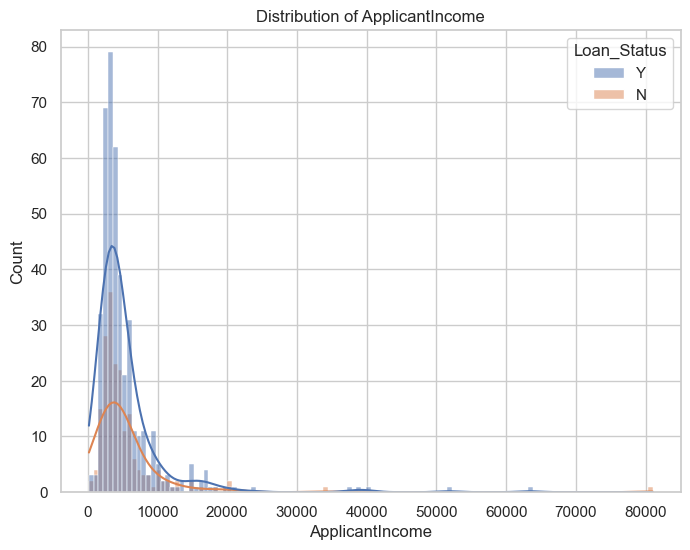

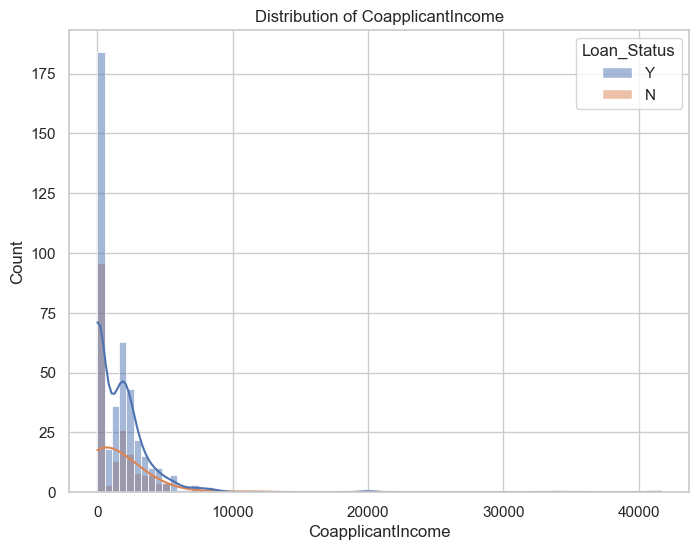

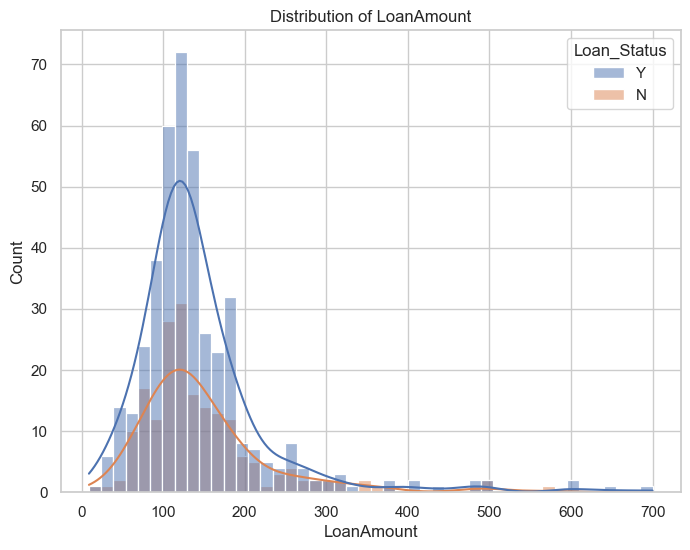

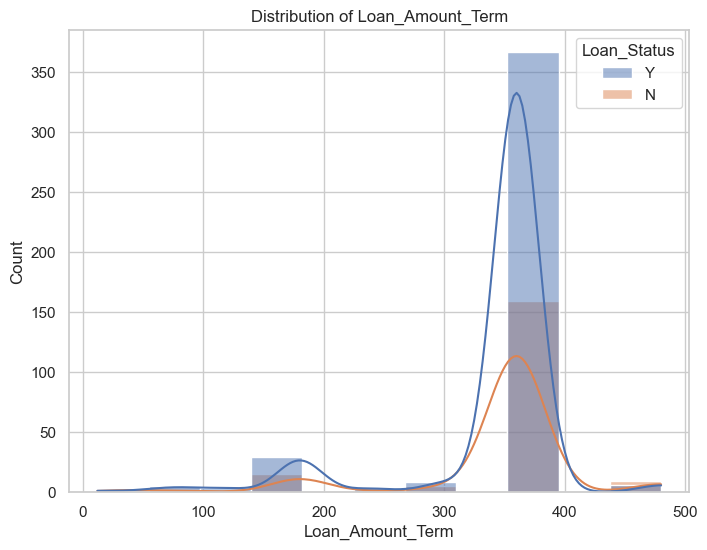

In [58]:
# Checking how the numerical features are distributed

for i in num_fts.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=num_fts,x=i ,hue='Loan_Status',kde = True)
    plt.title(f'Distribution of {i}')
    plt.show()

It is observed that almost all of the features are right skewed

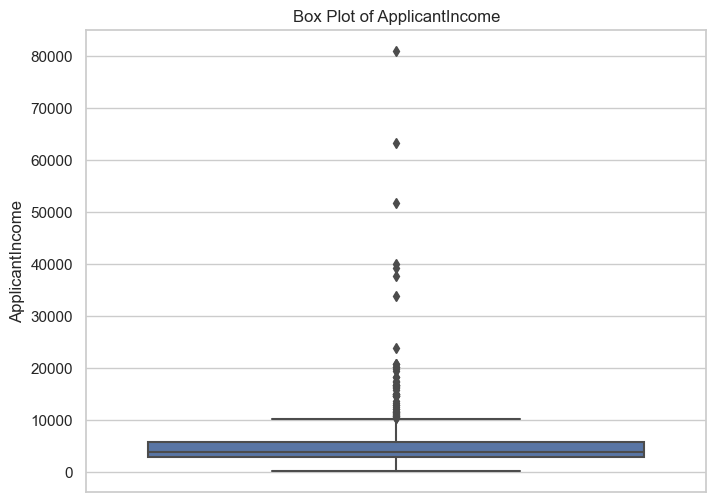

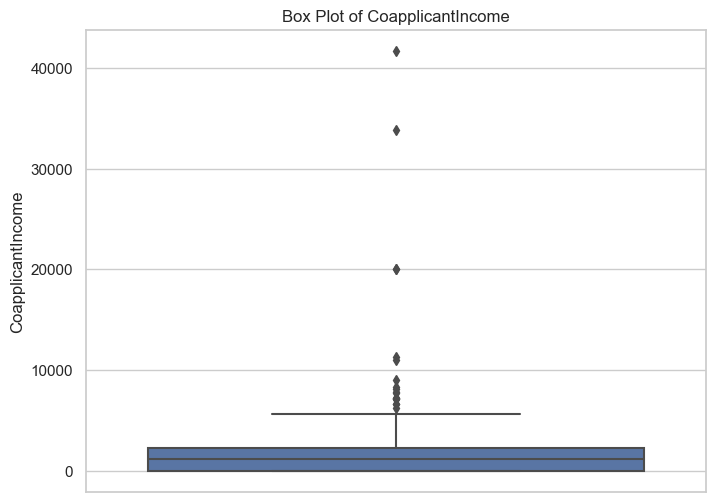

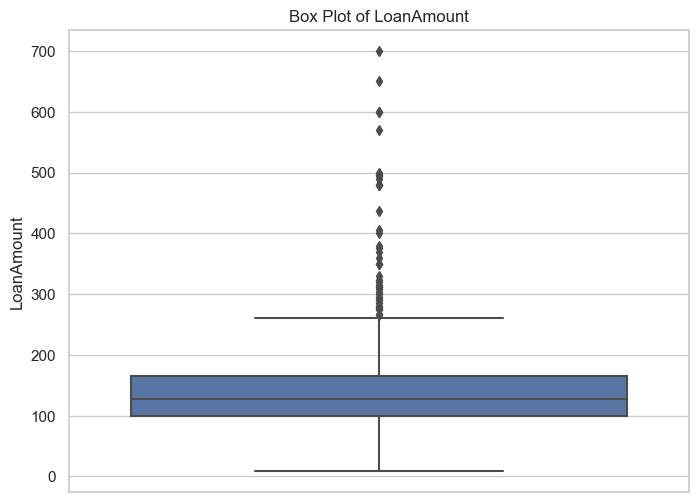

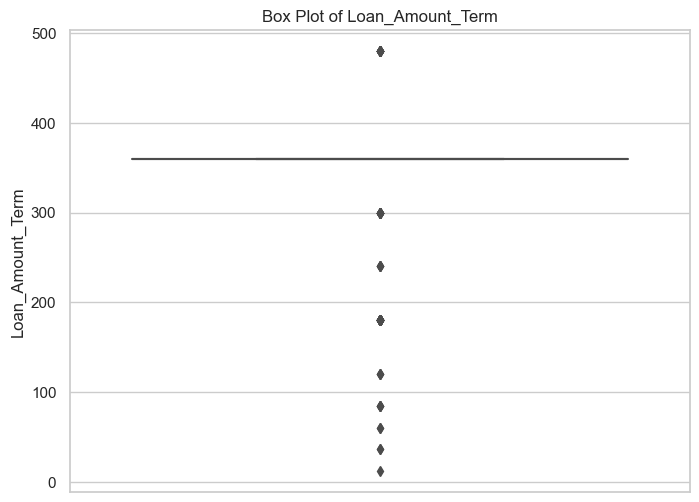

In [59]:
for i in num_fts.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=num_fts,y=i)
    plt.title(f'Box Plot of {i}')
    plt.show()

There is clearly presence of outliers in almost all of the features, The same will be treated during data preprocessing.

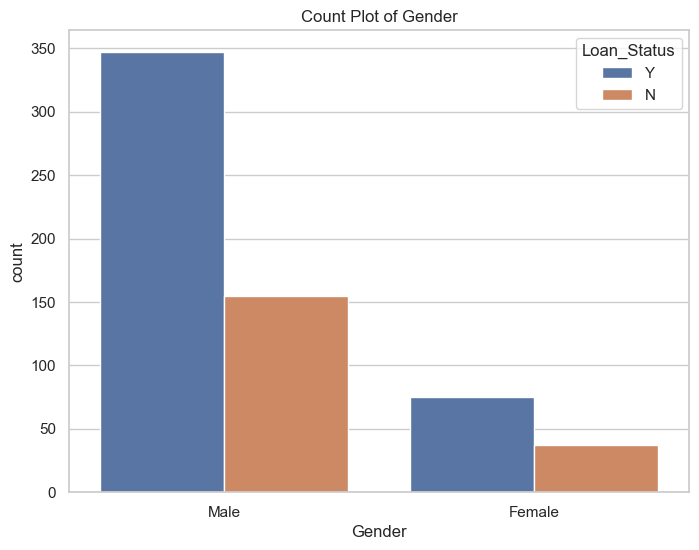

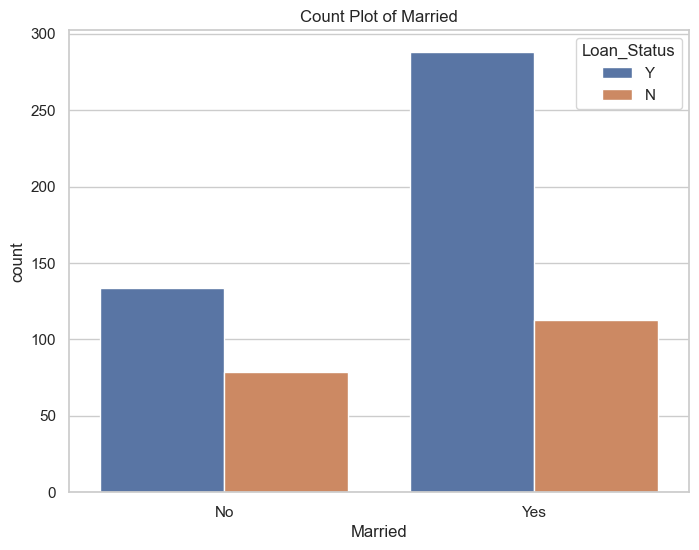

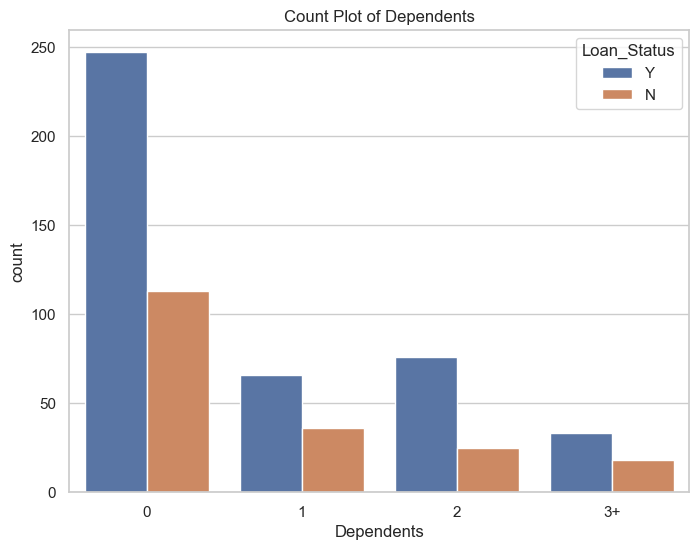

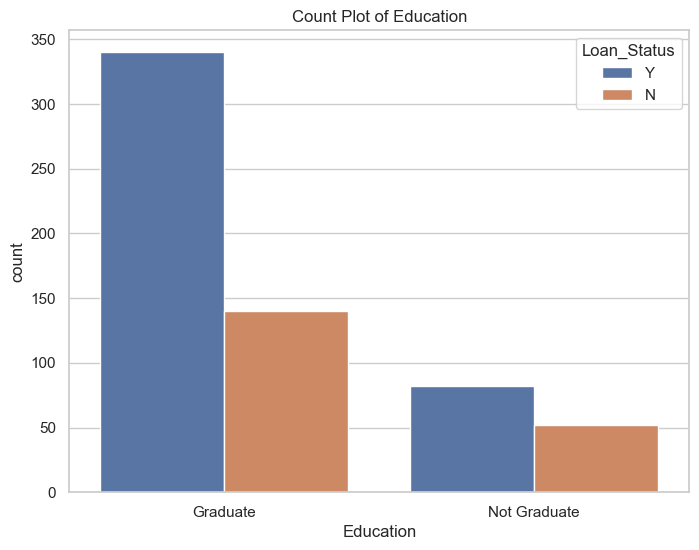

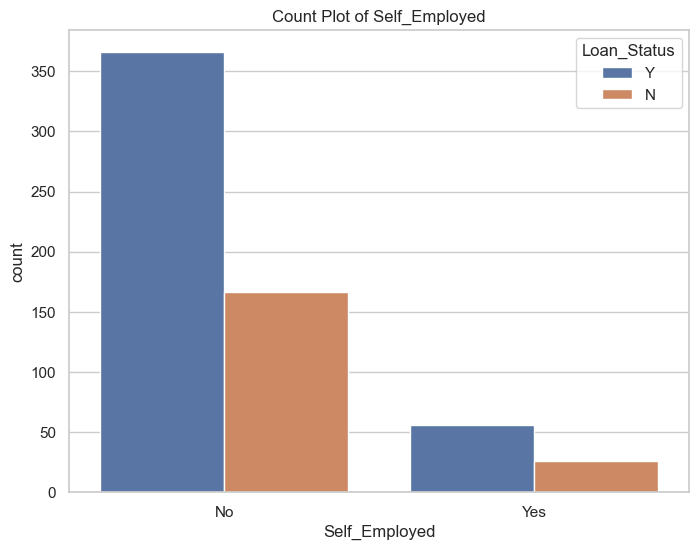

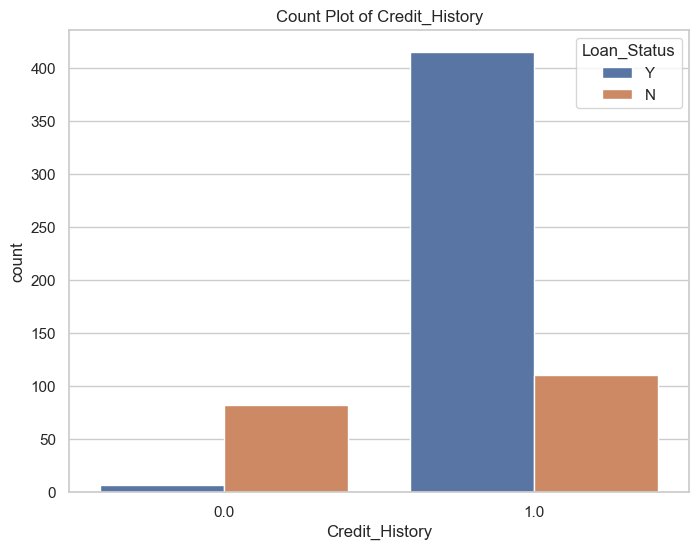

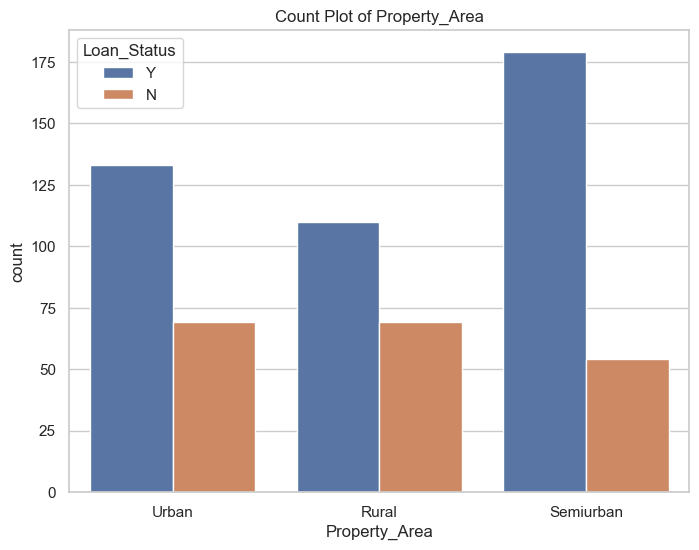

In [60]:
for i in cat_fts.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.countplot(data=cat_fts, x=i, hue='Loan_Status')
    plt.title(f'Count Plot of {i}')
    plt.show()

In [70]:
round(sum((df_train['Credit_History'] == 0.0) & (df_train['Loan_Status'] == 'Y'))/len(df_train)*100,3)

1.14

It can be observed that most of the applicants are male, married, have 0 dependents, are graduates, mostly are salaried and are qualifying the credit history requirements, located in Semiurban/Suburbs.

It is evident that for the loan to be approved that applicant has to have satisfied the credit history requirements as only 1.14% of observations reflect the applicants being approved of loans without satisfying credit history requirements.

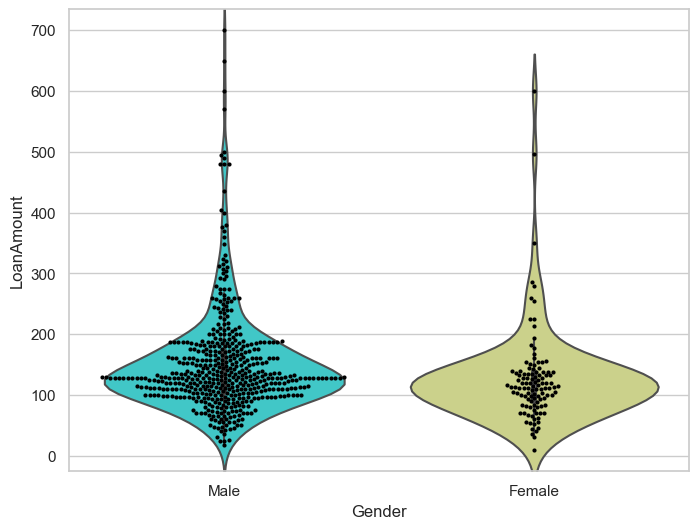

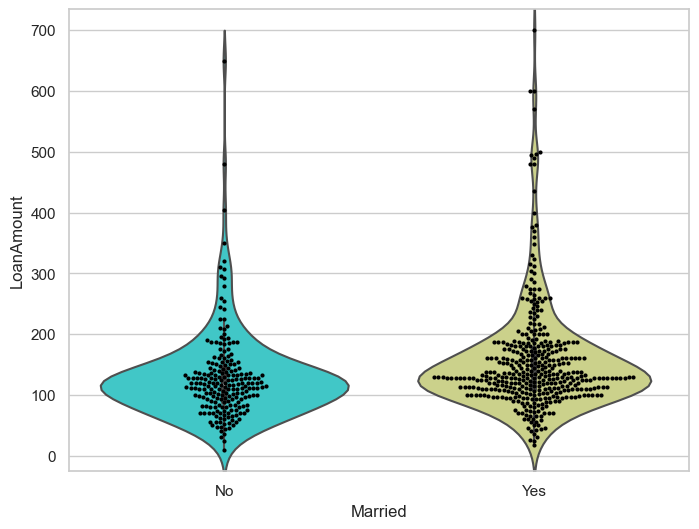

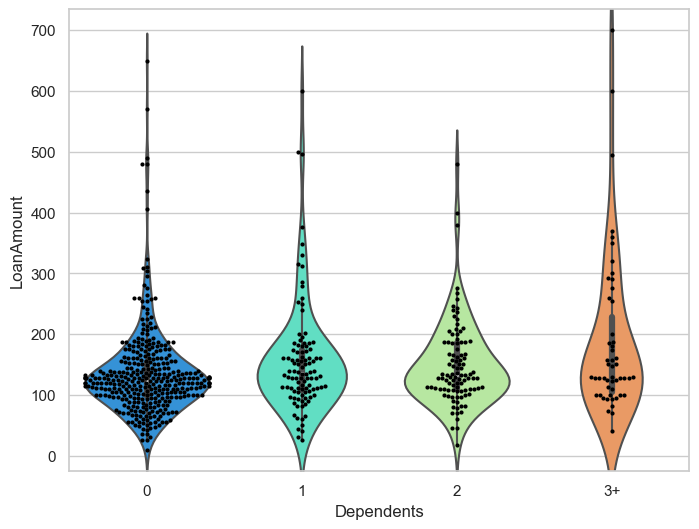

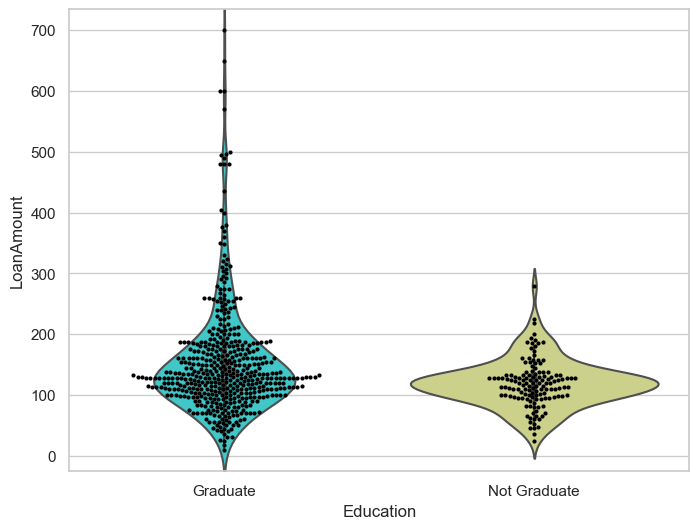

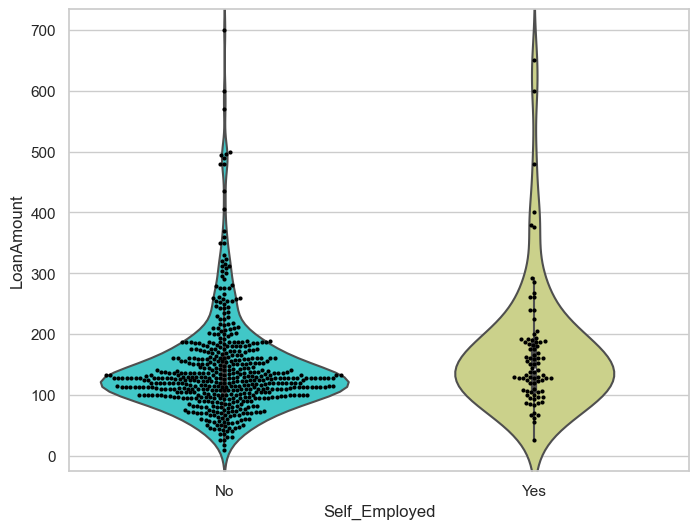

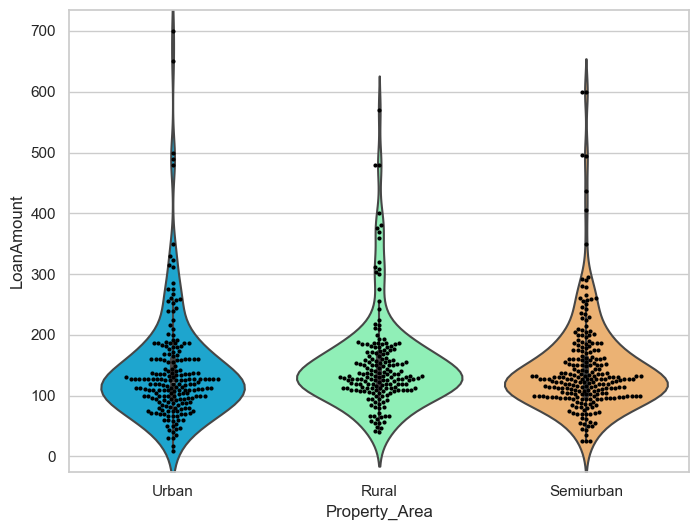

In [73]:
for i in cat_fts.columns.drop(['Credit_History', 'Loan_Status']):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=i, y=df_train['LoanAmount'], data=cat_fts,palette='rainbow')
    sns.swarmplot(x=i, y=df_train['LoanAmount'], data=cat_fts,color='black',size=3)
    plt.show()

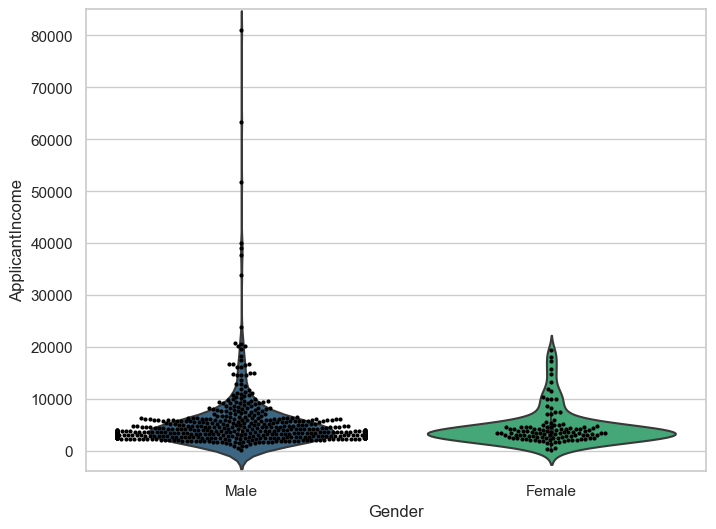

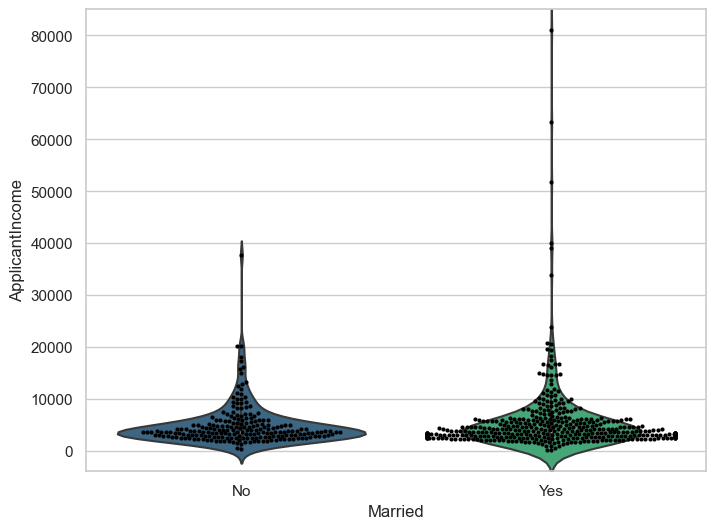

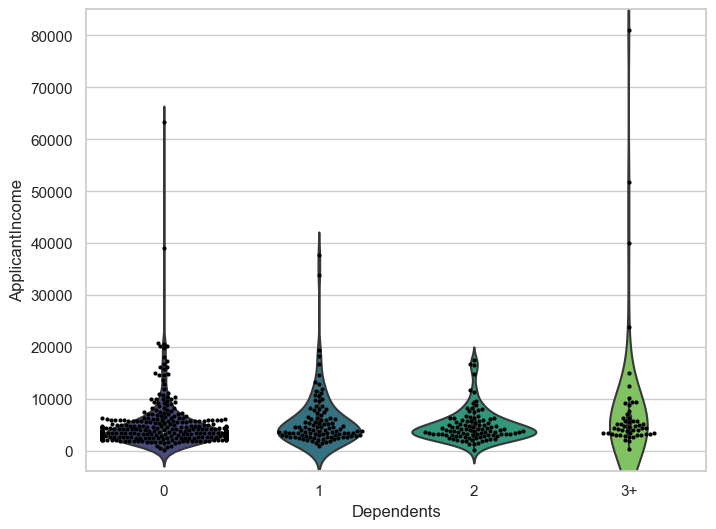

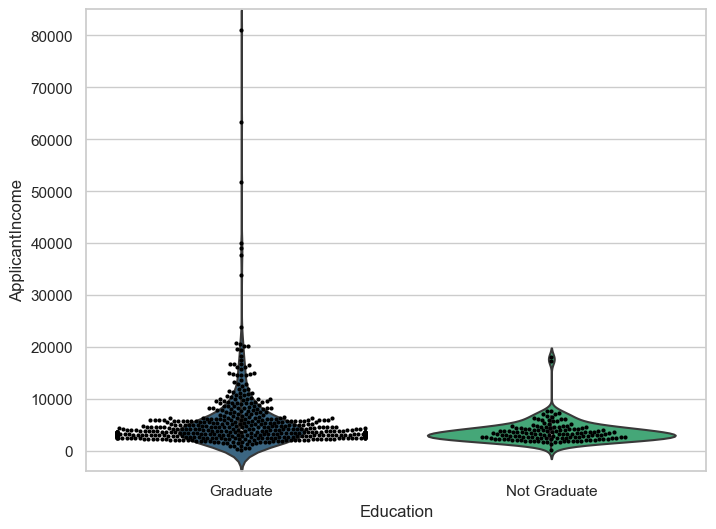

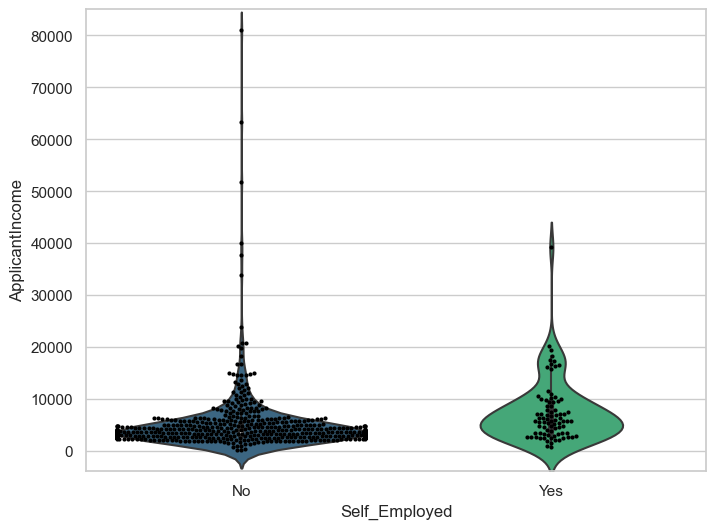

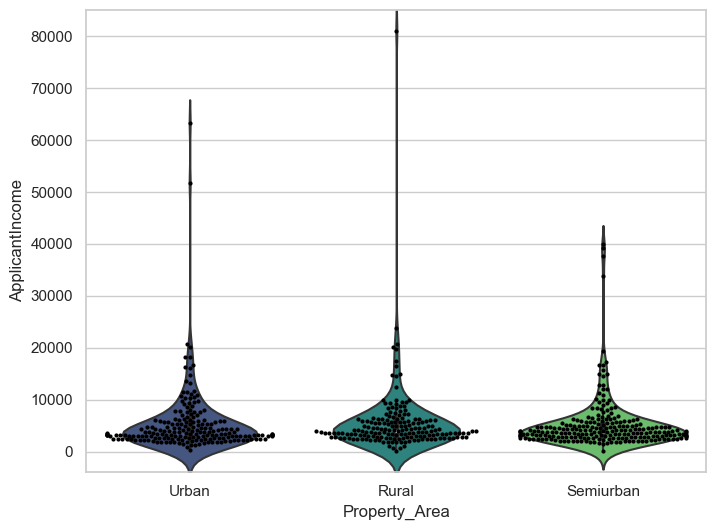

In [76]:
for i in cat_fts.columns.drop(['Credit_History', 'Loan_Status']):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=i, y=df_train['ApplicantIncome'], data=cat_fts,palette='viridis')
    sns.swarmplot(x=i, y=df_train['ApplicantIncome'], data=cat_fts,color='black',size=3)
    plt.show()

We can observe that majority of applicants are having an income of less than $10,000

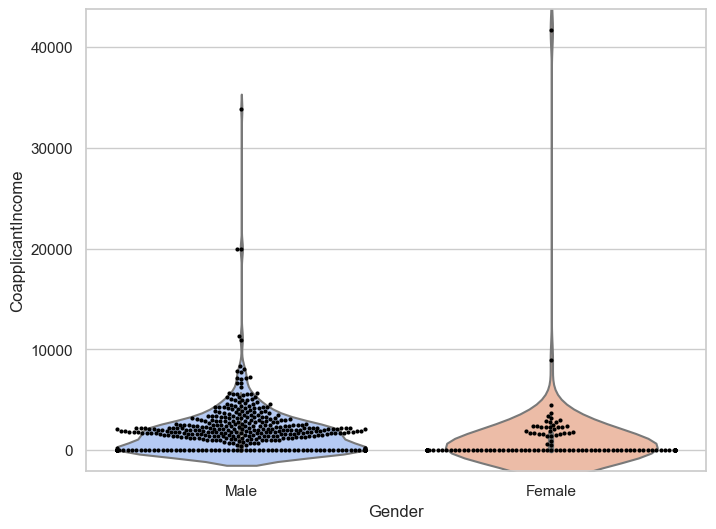

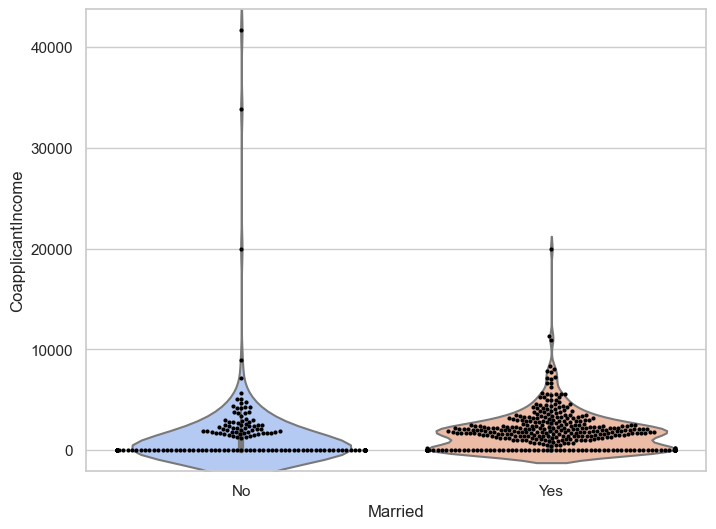

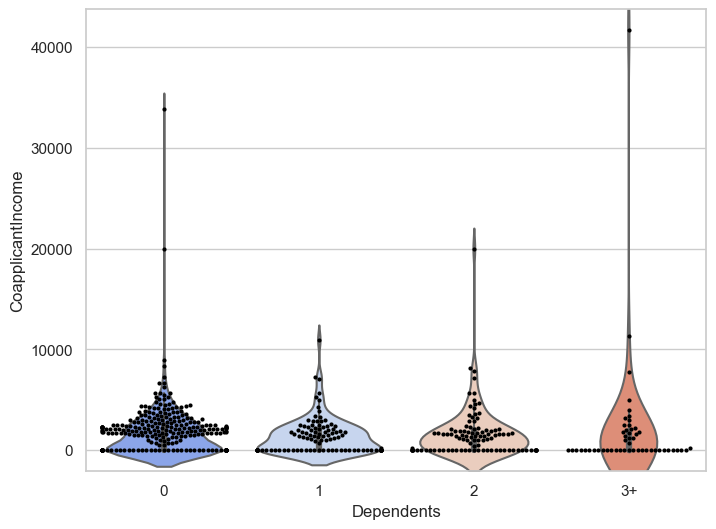

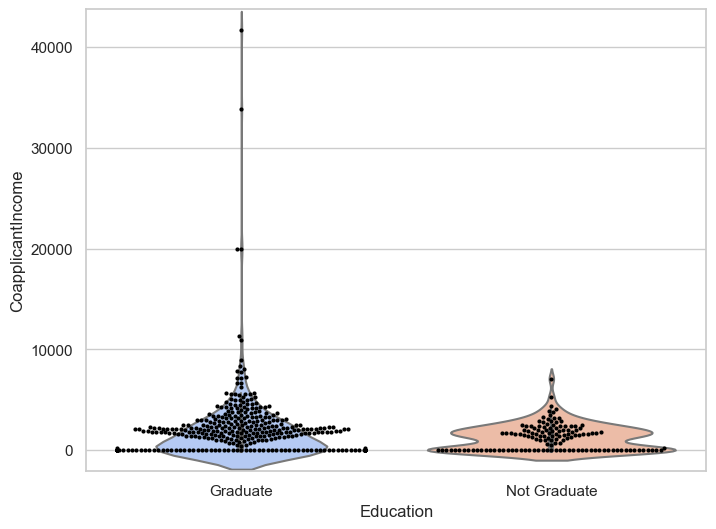

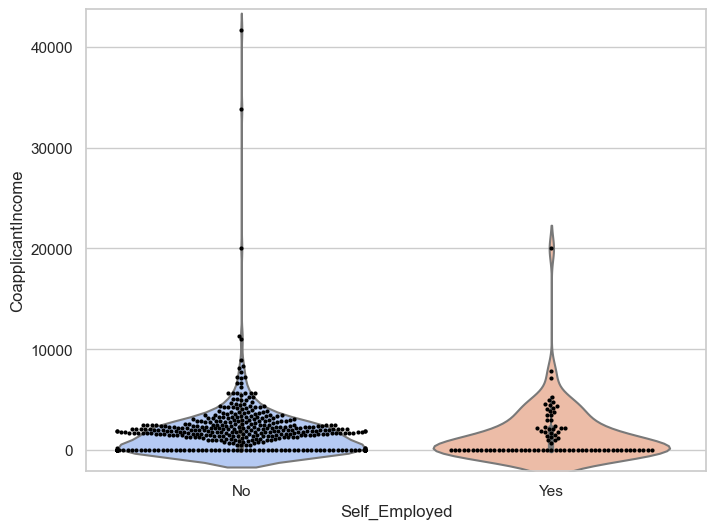

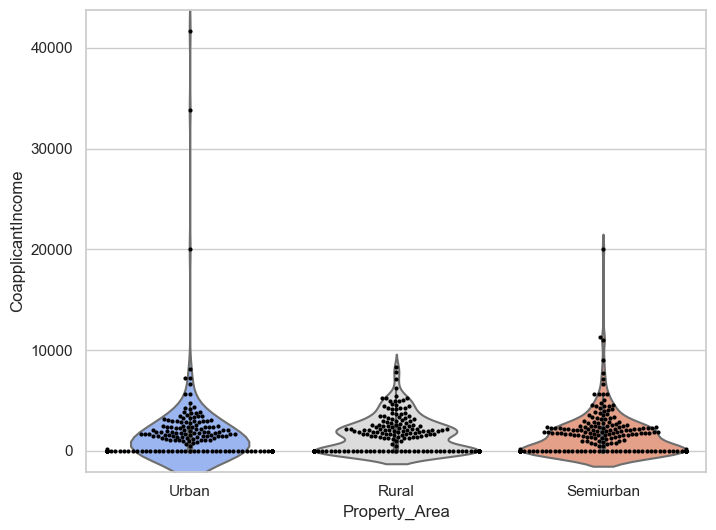

In [77]:
for i in cat_fts.columns.drop(['Credit_History', 'Loan_Status']):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=i, y=df_train['CoapplicantIncome'], data=cat_fts,palette='coolwarm')
    sns.swarmplot(x=i, y=df_train['CoapplicantIncome'], data=cat_fts,color='black',size=3)
    plt.show()

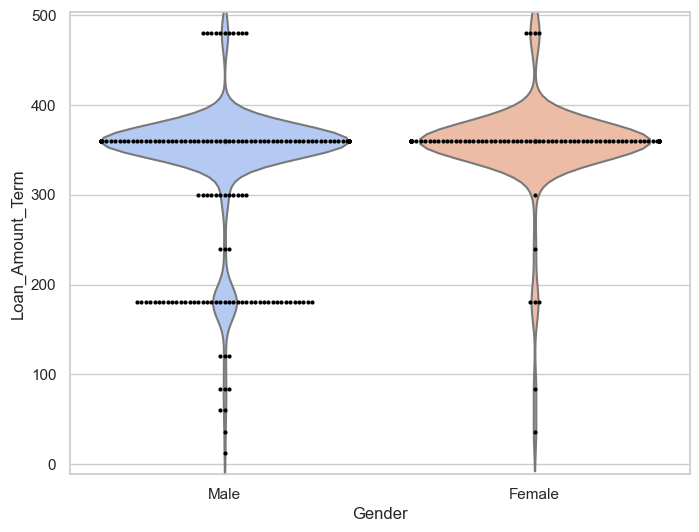

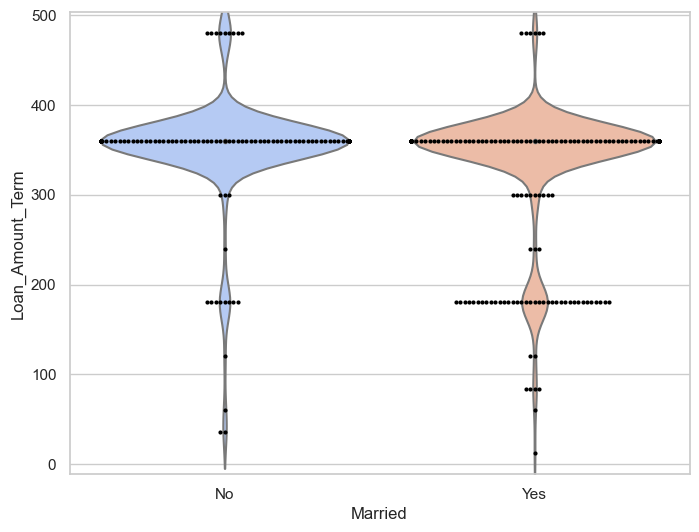

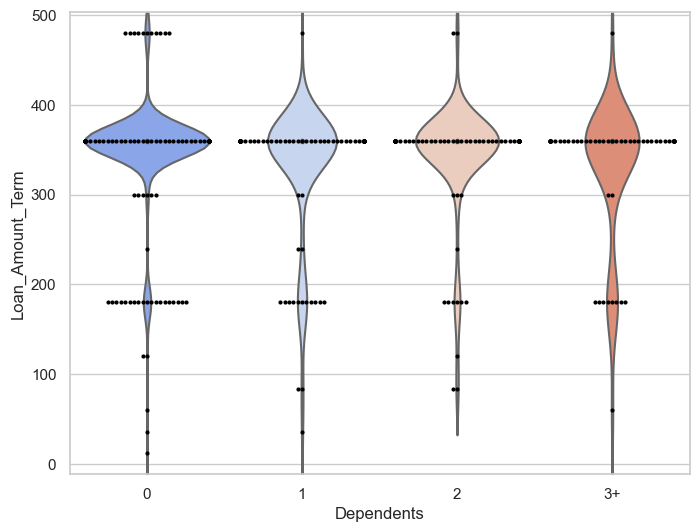

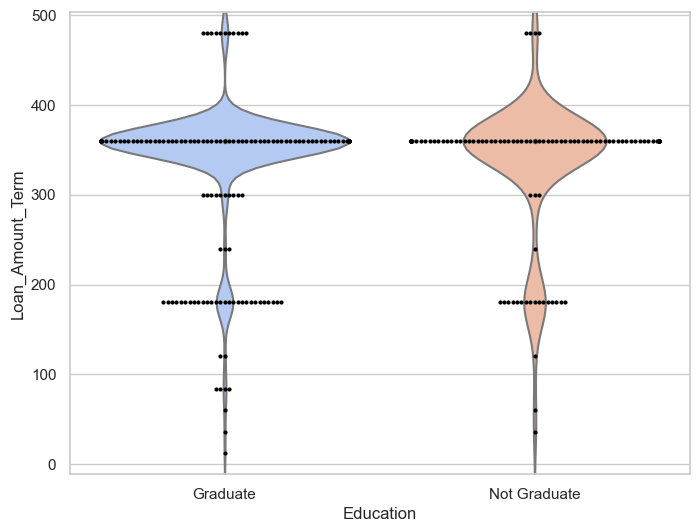

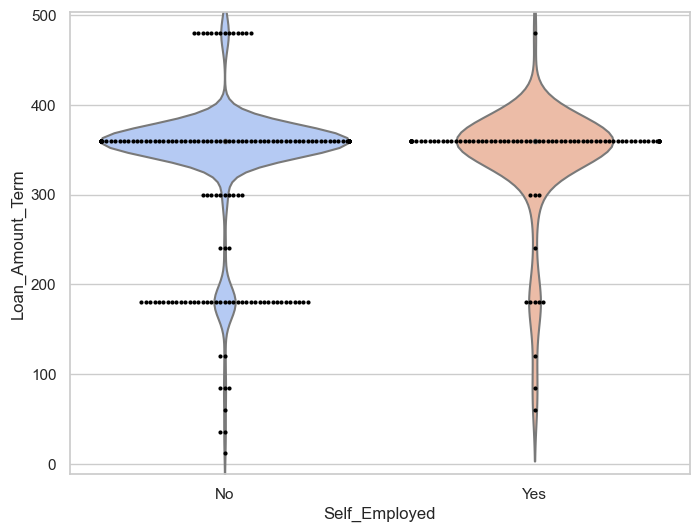

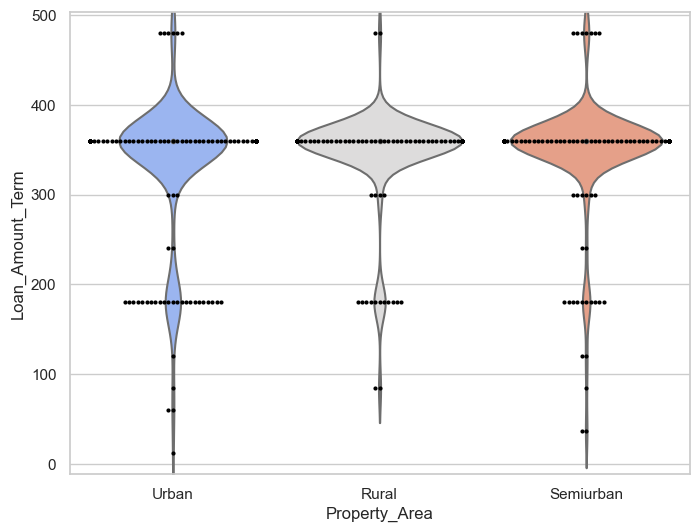

In [78]:
for i in cat_fts.columns.drop(['Credit_History', 'Loan_Status']):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=i, y=df_train['Loan_Amount_Term'], data=cat_fts,palette='coolwarm')
    sns.swarmplot(x=i, y=df_train['Loan_Amount_Term'], data=cat_fts,color='black',size=3)
    plt.show()

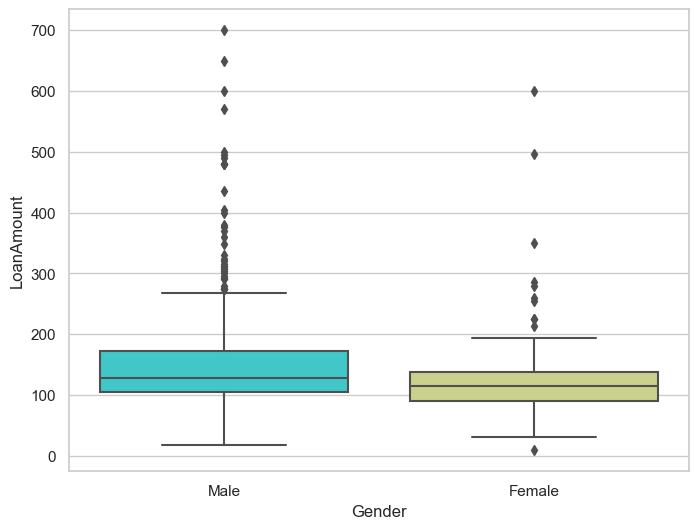

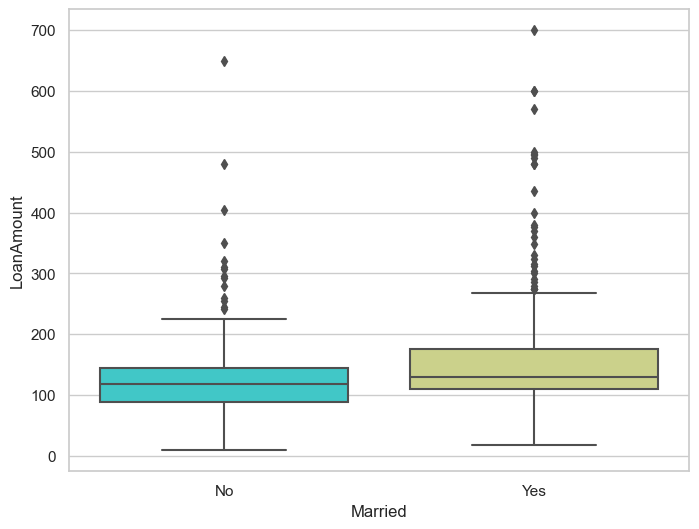

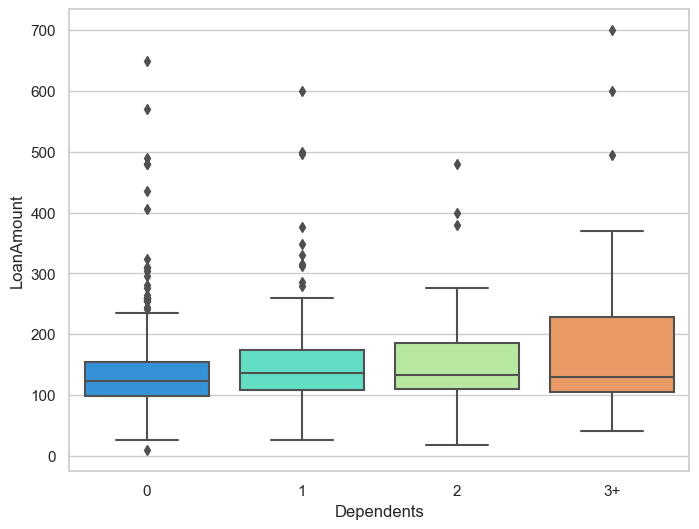

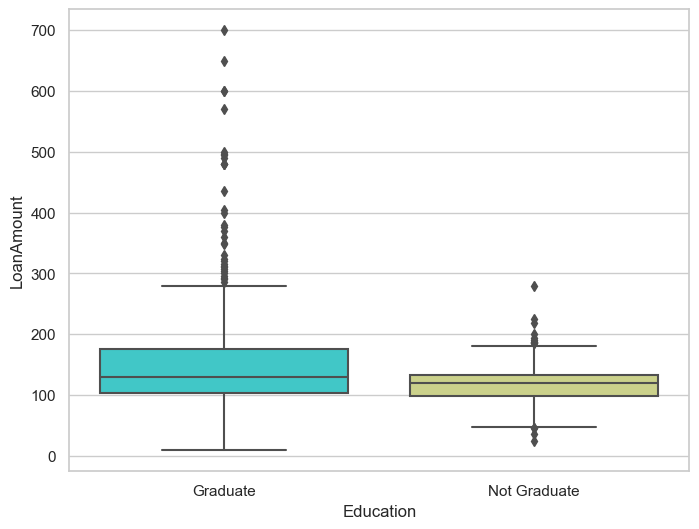

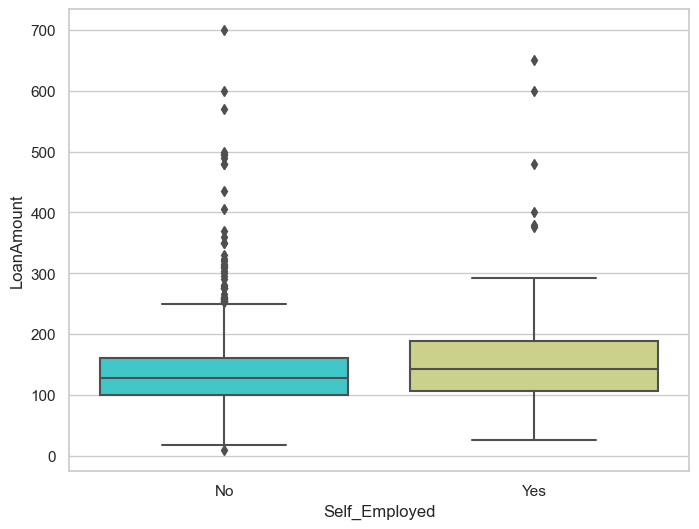

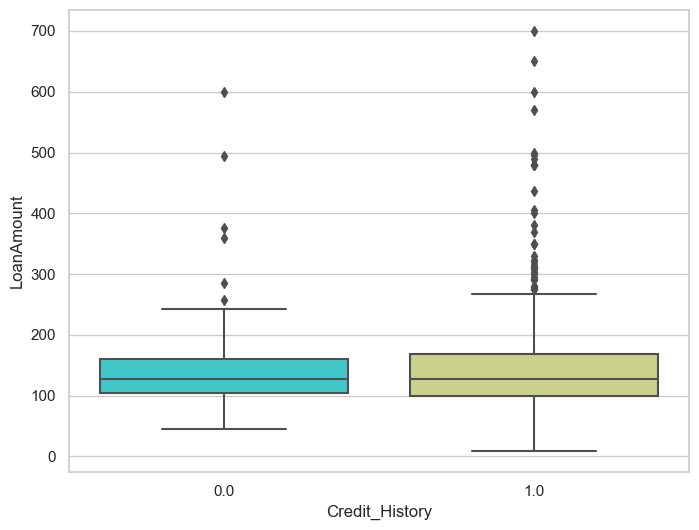

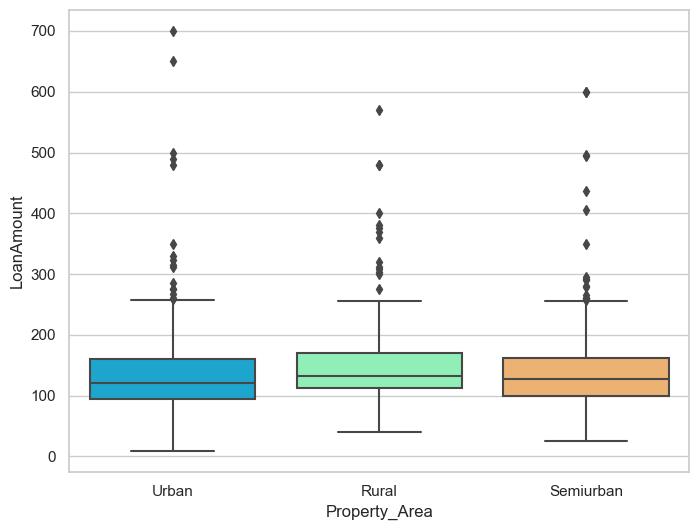

In [79]:
for i in cat_fts.columns.drop(['Loan_Status']):
    plt.figure(figsize=(8,6))
    sns.boxplot(x=i, y=df_train['LoanAmount'], data=cat_fts,palette='rainbow')
    plt.show()

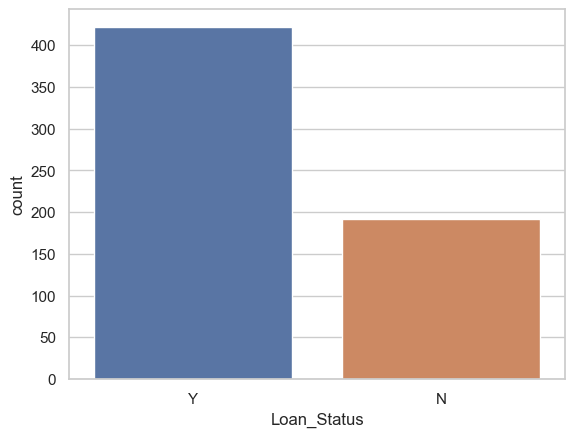

In [81]:
sns.countplot(data=df_train, x = 'Loan_Status')
plt.show()

In [82]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

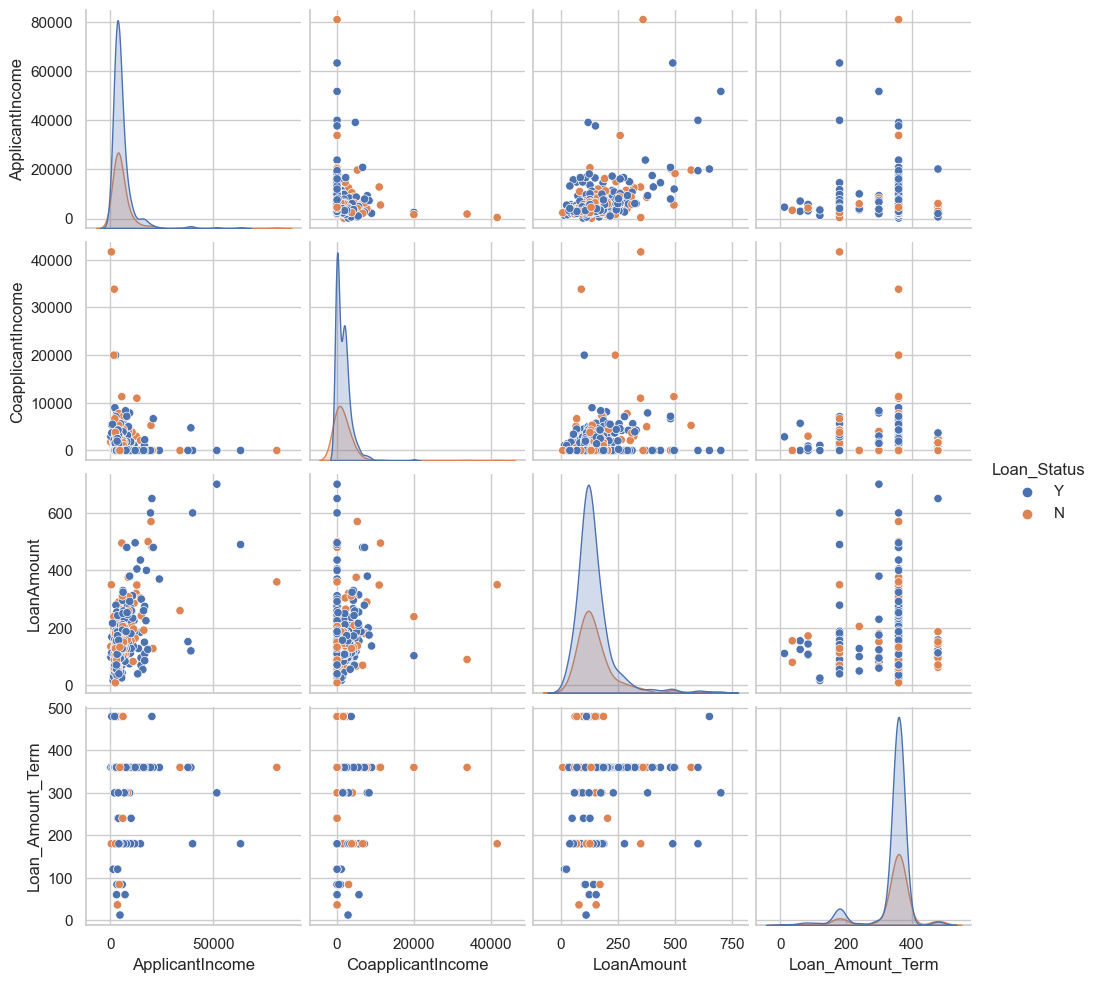

In [80]:
sns.pairplot(num_fts, hue='Loan_Status')
plt.show()

## Multivariate Analysis

In [85]:
label_encoded = df_train.copy()

In [89]:
label_encoded.dtypes

Gender                  int8
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [88]:
label_encoded['Gender'] = label_encoded['Gender'].astype('category')
label_encoded['Gender'] = label_encoded['Gender'].cat.codes

In [90]:
label_encoded['Married'] = label_encoded['Married'].astype('category')
label_encoded['Married'] = label_encoded['Married'].cat.codes

In [93]:
label_encoded['Dependents'] = label_encoded['Dependents'].astype('category')
label_encoded['Dependents'] = label_encoded['Dependents'].cat.codes

In [96]:
label_encoded['Education'] = label_encoded['Education'].astype('category')
label_encoded['Education'] = label_encoded['Education'].cat.codes

In [97]:
label_encoded['Self_Employed'] = label_encoded['Self_Employed'].astype('category')
label_encoded['Self_Employed'] = label_encoded['Self_Employed'].cat.codes

In [98]:
label_encoded['Property_Area'] = label_encoded['Property_Area'].astype('category')
label_encoded['Property_Area'] = label_encoded['Property_Area'].cat.codes

In [99]:
label_encoded['Loan_Status'] = label_encoded['Loan_Status'].astype('category')
label_encoded['Loan_Status'] = label_encoded['Loan_Status'].cat.codes

In [101]:
# Checking the correlation matrix.

label_encoded.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


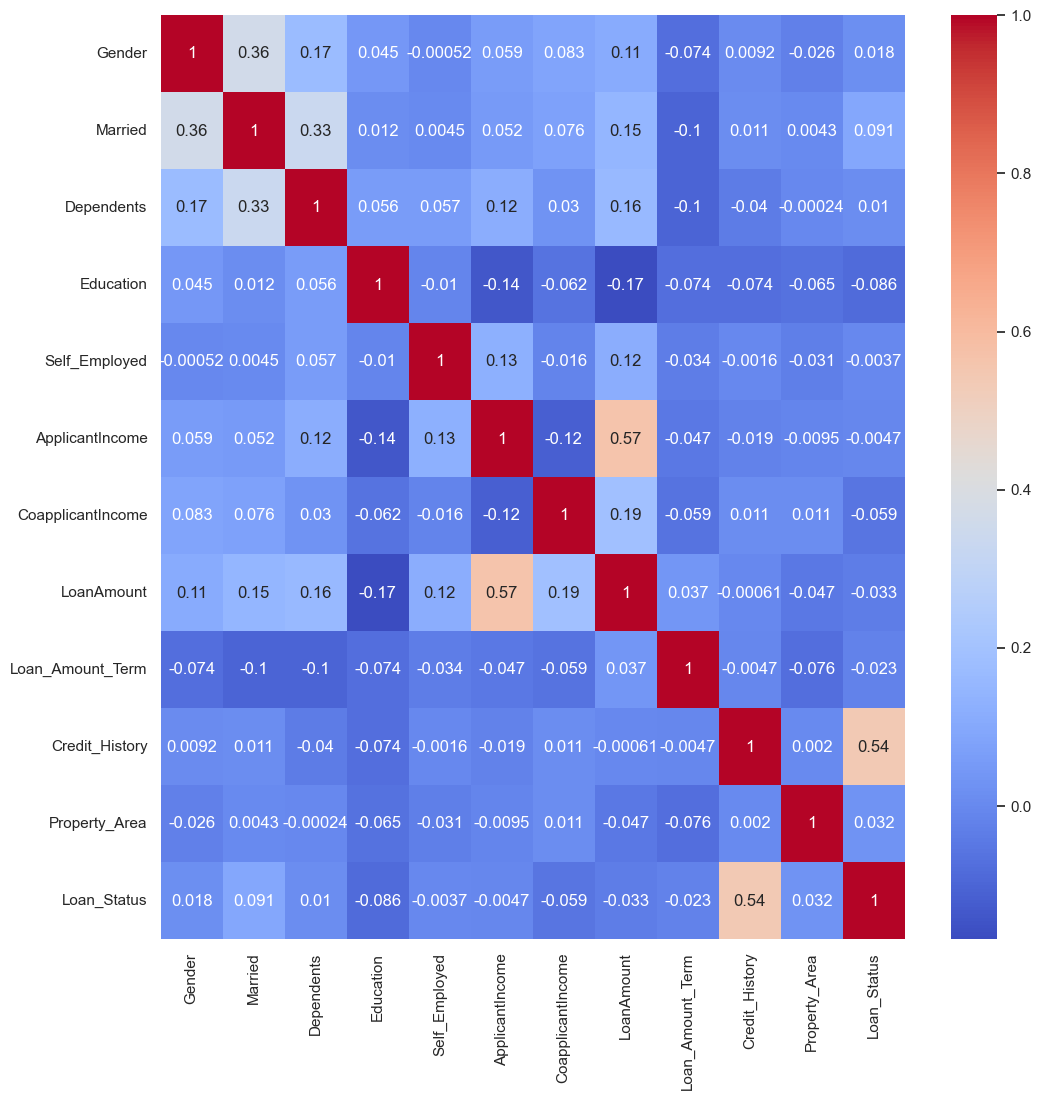

In [104]:
# The same can be visualised in the form of a heatmap.

plt.figure(figsize=(12,12))
sns.heatmap(label_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

In [20]:
# Taking a copy of the imputed data for preprocessing and model building

df1 = df_train.copy()

## Handling missing values

Missing values are already handled.

## Label Encoding

In [21]:
# Female: 0, Male: 1

df1['Gender'] = df1['Gender'].astype('category')
df1['Gender'] = df1['Gender'].cat.codes

In [22]:
# No: 0, Yes: 1

df1['Married'] = df1['Married'].astype('category')
df1['Married'] = df1['Married'].cat.codes

In [23]:
# Not Graduate: 0, Graduate: 1 

df1['Education'] = df1['Education'].replace({'Not Graduate': 0,  'Graduate': 1})

In [24]:
# No: 0, Yes: 1

df1['Self_Employed'] = df1['Self_Employed'].astype('category')
df1['Self_Employed'] = df1['Self_Employed'].cat.codes

In [25]:
# N: 0, Y: 1

df1['Loan_Status'] = df1['Loan_Status'].astype('category')
df1['Loan_Status'] = df1['Loan_Status'].cat.codes

In [26]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
df1['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

## One Hot Encoding

In [28]:
df1 = pd.get_dummies(data=df1,columns=['Dependents'], drop_first=True)

In [29]:
df1 = pd.get_dummies(data=df1,columns=['Property_Area'], drop_first=True)

In [31]:
pd.DataFrame(df1.dtypes, columns=['Datatypes'], index = df1.columns)

,Datatypes
Gender,int8
Married,int8
Education,int64
Self_Employed,int8
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,int8


## Handling Outliers

Outliers are not treated as the applicants details are realistic and the model being used is Bagging Classifier hence there will be no adverse affects on model accuracy if there is the presence of outliers

## Feature Extraction

In [33]:
# Loan Approval cannot be depending upon the gender of an applicant, hence dropping it.
# Self Employment, Dependents, Loan Amount term are least significant as per correlation results.

In [35]:
df3 = df1[[ 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History',
        'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status']]

In [36]:
df3.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,5849,0.0,128.0,1.0,0,1,1
1,1,1,4583,1508.0,128.0,1.0,0,0,0
2,1,1,3000,0.0,66.0,1.0,0,1,1
3,1,0,2583,2358.0,120.0,1.0,0,1,1
4,0,1,6000,0.0,141.0,1.0,0,1,1


### Splitting the data into dependent variable and independent variable:

In [37]:
x = df3.drop('Loan_Status',axis=1)
y = df3['Loan_Status']

# Imbalance Treatment of the Output variable

In [38]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [39]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler()
x_balanced,y_balanced = over_sampler.fit_resample(x,y) 

In [40]:
y_balanced.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

### Splitting the data into train and test:

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.3, random_state=42)

In [44]:
# importing necessary models from sklearn for model building:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Importing performance metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

In [47]:
# Building Binary classification Logistic regression model.

logit = LogisticRegression(C= 0.1,penalty=None)
logit.fit(x_train, y_train)
logit_preds_train = logit.predict(x_train)
logit_preds_test = logit.predict(x_test)

In [48]:
print("Train Classification report and confusion matrix for Logit model:")
print('\n')
print(classification_report(y_train, logit_preds_train))
print(confusion_matrix(y_train, logit_preds_train))
print('\n')
print("Train accuracy score:", accuracy_score(y_train, logit_preds_train))

Train Classification report and confusion matrix for Logit model:


              precision    recall  f1-score   support

           0       0.85      0.49      0.62       286
           1       0.66      0.92      0.77       304

    accuracy                           0.71       590
   macro avg       0.76      0.71      0.69       590
weighted avg       0.75      0.71      0.70       590

[[140 146]
 [ 24 280]]


Train accuracy score: 0.711864406779661


In [49]:
print("Test Classification report and confusion matrix for Logit model:")
print('\n')
print(classification_report(y_test, logit_preds_test))
print(confusion_matrix(y_test, logit_preds_test))
print('\n')
print("Test accuracy score:", accuracy_score(y_test, logit_preds_test))

Test Classification report and confusion matrix for Logit model:


              precision    recall  f1-score   support

           0       0.89      0.50      0.64       136
           1       0.62      0.93      0.74       118

    accuracy                           0.70       254
   macro avg       0.76      0.72      0.69       254
weighted avg       0.77      0.70      0.69       254

[[ 68  68]
 [  8 110]]


Test accuracy score: 0.7007874015748031


In [62]:
# Building Random Forest Classifier model:

rfc = RandomForestClassifier(max_depth=5, n_estimators = 200)
rfc.fit(x_train, y_train)
rfc_preds_train = rfc.predict(x_train)
rfc_preds_test = rfc.predict(x_test)

In [63]:
print("Train Classification report and confusion matrix for Random Forest model:")
print('\n')
print(classification_report(y_train, rfc_preds_train))
print(confusion_matrix(y_train, rfc_preds_train))
print('\n')
print("Train accuracy score:", accuracy_score(y_train, rfc_preds_train))

Train Classification report and confusion matrix for Random Forest model:


              precision    recall  f1-score   support

           0       0.95      0.72      0.82       286
           1       0.79      0.96      0.87       304

    accuracy                           0.85       590
   macro avg       0.87      0.84      0.84       590
weighted avg       0.87      0.85      0.84       590

[[207  79]
 [ 11 293]]


Train accuracy score: 0.847457627118644


In [64]:
print("Test Classification report and confusion matrix for Random Forest model:")
print('\n')
print(classification_report(y_test, rfc_preds_test))
print(confusion_matrix(y_test, rfc_preds_test))
print('\n')
print("Test accuracy score:", accuracy_score(y_test, rfc_preds_test))

Test Classification report and confusion matrix for Random Forest model:


              precision    recall  f1-score   support

           0       0.84      0.58      0.69       136
           1       0.64      0.87      0.74       118

    accuracy                           0.72       254
   macro avg       0.74      0.73      0.71       254
weighted avg       0.75      0.72      0.71       254

[[ 79  57]
 [ 15 103]]


Test accuracy score: 0.7165354330708661


In [65]:
train_accuracy = cross_val_score(estimator=rfc, X=x_train, y = y_train, scoring='accuracy', cv=10)
test_accuracy = cross_val_score(estimator=rfc, X=x_test, y = y_test, scoring='accuracy', cv=10)
print(np.mean(train_accuracy))
print(np.mean(test_accuracy))

0.7694915254237288
0.7475384615384615


In [66]:
# Building Bagging Classifier model:

bgc = BaggingClassifier()
bgc.fit(x_train, y_train)
bgc_preds_train = bgc.predict(x_train)
bgc_preds_test = bgc.predict(x_test)

In [67]:
print("Train Classification report and confusion matrix for Bagging model:")
print('\n')
print(classification_report(y_train, bgc_preds_train))
print(confusion_matrix(y_train, bgc_preds_train))
print('\n')
print("Train accuracy score:", accuracy_score(y_train, bgc_preds_train))

Train Classification report and confusion matrix for Bagging model:


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.99      0.99       304

    accuracy                           0.99       590
   macro avg       0.99      0.99      0.99       590
weighted avg       0.99      0.99      0.99       590

[[284   2]
 [  2 302]]


Train accuracy score: 0.9932203389830508


In [68]:
print("Test Classification report and confusion matrix for Bagging model:")
print('\n')
print(classification_report(y_test, bgc_preds_test))
print(confusion_matrix(y_test, bgc_preds_test))
print('\n')
print("Test accuracy score:", accuracy_score(y_test, bgc_preds_test))

Test Classification report and confusion matrix for Bagging model:


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       136
           1       0.78      0.73      0.75       118

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254

[[112  24]
 [ 32  86]]


Test accuracy score: 0.7795275590551181


In [72]:
train_accuracy = cross_val_score(estimator=bgc, X=x_train, y = y_train, scoring='accuracy', cv=10)
test_accuracy = cross_val_score(estimator=bgc, X=x_test, y = y_test, scoring='accuracy', cv=10)
print(np.mean(train_accuracy))
print(np.mean(test_accuracy))

0.8338983050847458
0.7555384615384615


### Choosing the Bagging Classifier model as our final model as it is showing 83% train accuracy on 10 and 75% test accuracy on  cross validation folds

In [84]:
# Checking performance of the model using ROC-AUC Curve

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [89]:
bgc_roc_under_auc = roc_auc_score(y_test,bgc_preds_test)

In [90]:
bgc_roc_under_auc

0.7761714855433698

In [91]:
fpr, tpr, thres = roc_curve(y_test, bgc_preds_test)
display(fpr[:10])
display(tpr[:10])
display(thres[:10])

array([0.        , 0.17647059, 1.        ])

array([0.        , 0.72881356, 1.        ])

array([inf,  1.,  0.])

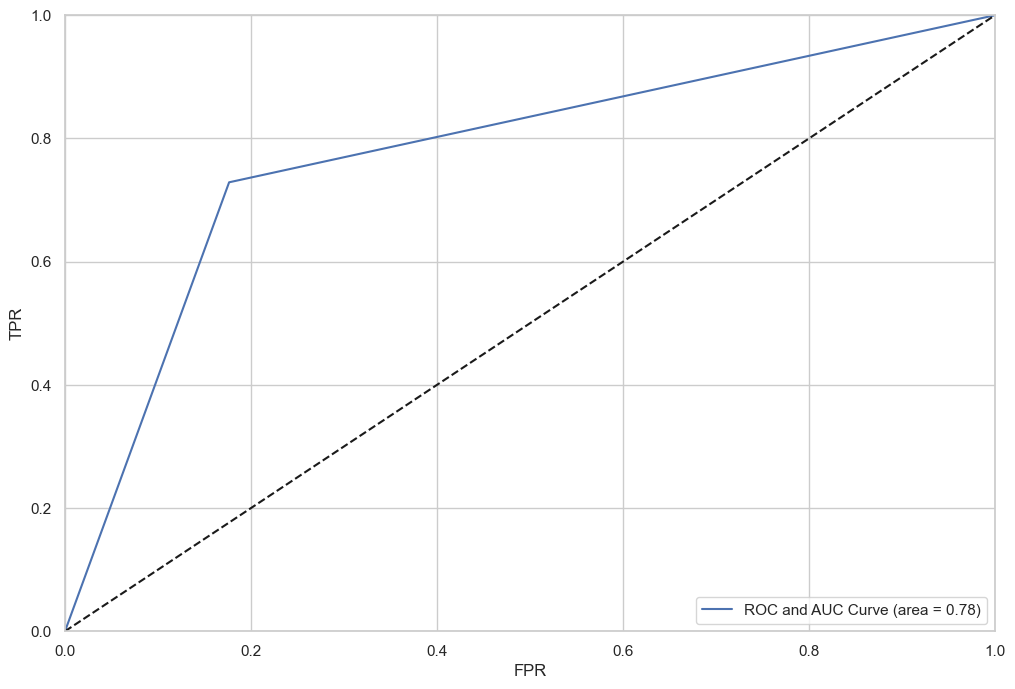

In [92]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve (area = %0.2f)' % bgc_roc_under_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc='lower right')
plt.show()

## Concluding: Since the model is showing good performance in the ROC-AUC Curve, the model using Bagging classifier with 10 fold cross validation train accuracy of 83% and Test accuracy of 75%, Hence the model can be said to be performing very well and can be used for deployment in production.

## Note: Since this is a Laon Approval dataset, the False Positive value should be as low as possible as we would not want to classify an applicant eligible for loan if they are actually not eligibe as this might cause potential loss to the institution.

In [113]:
# Handling the test data and loading it into the model for predictions:
df_test = pd.read_csv('loan_sanction_test.csv')
df_test.drop(['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term'], axis=1, inplace=True)

In [114]:
df_test.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Yes,Graduate,5720,0,110.0,1.0,Urban
1,Yes,Graduate,3076,1500,126.0,1.0,Urban
2,Yes,Graduate,5000,1800,208.0,1.0,Urban
3,Yes,Graduate,2340,2546,100.0,NaN,Urban
4,No,Not Graduate,3276,0,78.0,1.0,Urban


In [115]:
# Imputing missing values

df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())

df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0])

In [116]:
# Label Encoding and One Hot Encoding

df_test['Married'] = df_test['Married'].astype('category')
df_test['Married'] = df_test['Married'].cat.codes

df_test['Education'] = df_test['Education'].astype('category')
df_test['Education'] = df_test['Education'].cat.codes

In [117]:
df_test = pd.get_dummies(data=df_test, columns=['Property_Area'], drop_first= True)

In [118]:
df_test.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,5720,0,110.0,1.0,0,1
1,1,0,3076,1500,126.0,1.0,0,1
2,1,0,5000,1800,208.0,1.0,0,1
3,1,0,2340,2546,100.0,1.0,0,1
4,0,1,3276,0,78.0,1.0,0,1


In [119]:
df_test_predicted = df_test.copy()

In [120]:
df_test_predicted['Predicted Loan Status'] = bgc.predict(df_test)

In [122]:
df_test_predicted.head(15)

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Predicted Loan Status
0,1,0,5720,0,110.0,1.0,0,1,1
1,1,0,3076,1500,126.0,1.0,0,1,1
2,1,0,5000,1800,208.0,1.0,0,1,1
3,1,0,2340,2546,100.0,1.0,0,1,1
4,0,1,3276,0,78.0,1.0,0,1,1
5,1,1,2165,3422,152.0,1.0,0,1,1
6,0,1,2226,0,59.0,1.0,1,0,1
7,1,1,3881,0,147.0,0.0,0,0,0
8,1,0,13633,0,280.0,1.0,0,1,0
9,0,1,2400,2400,123.0,1.0,1,0,1


In [99]:
# Model Predictions using random feature values:

def loan_approval_pred(Married, Education, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History,
                      Property_Area_Semiurban, Property_Area_Urban):
    prediction = bgc.predict([[Married, Education, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History,
                      Property_Area_Semiurban, Property_Area_Urban]])
    if prediction == [1]:
        print('\n')
        return f'The applicant can be approved a loan for the said loan amount {LoanAmount} Thousand Dollars.'
    else:
        print('\n')
        return 'The applicant cannot be approved at this loan amount and is subject to further scrutiny (Senior Management Aapprovals)'

In [100]:
# Model taking input from user:

Married = int(input("Enter 1 if the applicant is married and 0 if not: "))
Education = int(input("Enter 1 if the applicant is a graduate and 0 if not: "))
ApplicantIncome = float(input("Enter the applocant income in dollars: "))
CoapplicantIncome = float(input("Enter the Co-applicant income in dollars:: "))
LoanAmount = float(input("Enter the loan amount/100000: "))
Credit_History = int(input("Enter 1 if the applicant has satisfied the credit requirement and 0 if not: "))
Property_Area_Semiurban = int(input("Enter 1 if the subject property area is semiurban if not 0: "))
Property_Area_Urban = int(input("Enter 1 if the subject property area is urban if not 0: "))

print(loan_approval_pred(Married, Education, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History,
                      Property_Area_Semiurban, Property_Area_Urban))

Enter 1 if the applicant is married and 0 if not: 1
Enter 1 if the applicant is a graduate and 0 if not: 1
Enter the applocant income in dollars: 2750
Enter the Co-applicant income in dollars:: 3520
Enter the loan amount/100000: 118
Enter 1 if the applicant has satisfied the credit requirement and 0 if not: 1
Enter 1 if the subject property area is semiurban if not 0: 0
Enter 1 if the subject property area is urban if not 0: 1


The applicant can be approved a loan for the said loan amount 118.0 Thousand Dollars.


In [101]:
# Model taking input from user:

Married = int(input("Enter 1 if the applicant is married and 0 if not: "))
Education = int(input("Enter 1 if the applicant is a graduate and 0 if not: "))
ApplicantIncome = float(input("Enter the applocant income in dollars: "))
CoapplicantIncome = float(input("Enter the Co-applicant income in dollars:: "))
LoanAmount = float(input("Enter the loan amount/100000: "))
Credit_History = int(input("Enter 1 if the applicant has satisfied the credit requirement and 0 if not: "))
Property_Area_Semiurban = int(input("Enter 1 if the subject property area is semiurban if not 0: "))
Property_Area_Urban = int(input("Enter 1 if the subject property area is urban if not 0: "))

print(loan_approval_pred(Married, Education, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History,
                      Property_Area_Semiurban, Property_Area_Urban))

Enter 1 if the applicant is married and 0 if not: 1
Enter 1 if the applicant is a graduate and 0 if not: 1
Enter the applocant income in dollars: 2500
Enter the Co-applicant income in dollars:: 2310
Enter the loan amount/100000: 185
Enter 1 if the applicant has satisfied the credit requirement and 0 if not: 0
Enter 1 if the subject property area is semiurban if not 0: 1
Enter 1 if the subject property area is urban if not 0: 0


The applicant cannot be approved at this loan amount and is subject to further scrutiny (Senior Management Aapprovals)
